In [ ]:
'''
Согласно пройденному материалу в инструкциях по практическим работам, необходимо написать работающий скрипт 
с использованием изученных библиотек (NumPy, Pandas, SciKit-Learn, SciPy, Statsmodels, Matplotlib и Seaborn)

- матрица неких данных (на свое усмотрение) и разделение их на группы по метрике косинусного расстояния ( библиотека NumPy).

- исследование на наборе данных (на свое усмотрение) и на основе данного исследования провести кратких рассказ 
своих результатов ( библиотеки Pandas, SciKit-Learn, SciPy, Statsmodels).

- постройка 3 визуализаций и с помощью них создать рассказ о закономерностях, связях  обнаруженных в своих данных
(библиотеки Matplotlib и Seaborn).
'''

In [1]:
import pandas as pd


gen_df=pd.read_csv('https://raw.githubusercontent.com/GVicSt/DataSets/genshin/genshin_impact_data.csv', sep='\t')[['name','rarity','element','level','friendship']]
gen_np_int=gen_df[['rarity','level','friendship']].to_numpy()
gen_df_int = pd.DataFrame({
    'rarity': gen_df['rarity'],
    'level': gen_df['level'],
    'friendship': gen_df['friendship']
})
gen_df

C:\Users\a\AppData\Local\Temp\ipykernel_16980\2611853457.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,name,rarity,element,level,friendship
0,Traveler,5,Anemo,80,0
1,Hu Tao,5,Pyro,70,5
2,Barbara,4,Hydro,50,4
3,Beidou,4,Electro,50,4
4,Noelle,4,Geo,50,4
5,Rosaria,4,Cryo,50,3
6,Razor,4,Electro,50,2
7,Xiangling,4,Pyro,50,2
8,Yanfei,4,Pyro,50,2
9,Xinyan,4,Pyro,50,1


In [3]:
# Первое задание

# матрица неких данных (на свое усмотрение) и разделение их на группы по метрике косинусного расстояния 
# ( библиотека NumPy).

import numpy as np

new_character = np.array([4, 50, 4]) # сравниваемый персонаж

def cosine( a, b ):
    
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

group = [0.5, 1]
list_t0 = []
list_t1 = [[],[],[]]
for characs in gen_np_int:
    list_t0.append(cosine(characs, new_character))
    print(len(list_t0), "схожесть", round(list_t0[-1], 6))
    
    list_t1[0 if cosine(characs, new_character) < group[0] else 2 if cosine(characs, new_character) >= group[1] else 1].append(len(list_t0))

print('Cамый похожий', list_t0.index(max(list_t0)) + 1)

print(str(pd.Series(list_t1, index=['<0.5', '>0.5 <1', '=1']))[:-13])

1 схожесть 0.996684
2 схожесть 0.999928
3 схожесть 1.0
4 схожесть 1.0
5 схожесть 1.0
6 схожесть 0.999803
7 схожесть 0.999211
8 схожесть 0.999211
9 схожесть 0.999211
10 схожесть 0.998222
11 схожесть 0.997608
12 схожесть 0.999001
13 схожесть 0.998563
14 схожесть 0.999358
15 схожесть 0.999358
16 схожесть 0.999358
17 схожесть 0.999358
18 схожесть 0.999358
19 схожесть 0.998308
20 схожесть 0.998308
21 схожесть 0.998308
22 схожесть 0.998308
23 схожесть 0.998308
24 схожесть 0.985969
25 схожесть 0.992659
26 схожесть 0.992659
27 схожесть 0.992659
28 схожесть 0.992659
29 схожесть 0.992659
30 схожесть 0.992659
31 схожесть 0.327891
32 схожесть 0.327891
Cамый похожий 3
<0.5                                                [31, 32]
>0.5 <1    [1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
=1                                                 [3, 4, 5]



		график
то есть, получается что есть небольшая зависимость.
 чем выше уровень, тем больше уровень дружбы, но это не касается главного персонажа,
 т. к. невозможно дружить с собой)

		средние значения
получив средние значения могу сказать: 
 во-первых средняя редкость персонажей 4.1875, что говорит о том, что в основном персонажи 4 редкости
 во-вторых средний уровень 37.90625, вместе с графиком понятно что сбалансированной пачки не получится
 в третьих средний уровень дружбы 1.78125, что очень мало учитывая, что максимальный это 10


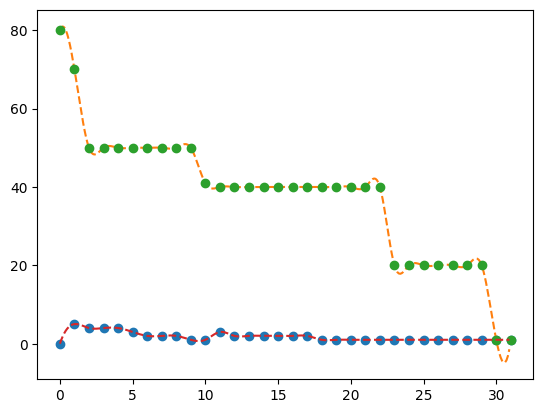

In [4]:
# Второе задание

# исследование на наборе данных (на свое усмотрение) и на основе данного исследования провести кратких рассказ 
# своих результатов 
# ( библиотеки Pandas, SciKit-Learn, SciPy, Statsmodels).

from scipy import interpolate
import matplotlib.pyplot as plt

interpol0 = interpolate.interp1d(range(32), gen_df['level'], kind = 'cubic')
interpol1 = interpolate.interp1d(range(32), gen_df['friendship'], kind = 'cubic')

z0 = interpol0(np.arange(0,31,0.1))
z1 = interpol1(np.arange(0,31,0.1))

plt.plot(range(32), gen_df['friendship'], 'o', np.arange(0,31,0.1), z0, '--')
plt.plot(range(32), gen_df['level'], 'o', np.arange(0,31,0.1), z1, '--')
print('''\t\tграфик\nто есть, получается что есть небольшая зависимость.
 чем выше уровень, тем больше уровень дружбы, но это не касается главного персонажа,
 т. к. невозможно дружить с собой)''')

mean = pd.DataFrame(gen_np_int).mean(axis=0)

print(f'\n\t\tсредние значения\nполучив средние значения могу сказать: \n во-первых средняя редкость персонажей {mean[0]}, что говорит о том, что в основном персонажи 4 редкости\n во-вторых средний уровень {mean[1]}, вместе с графиком понятно что сбалансированной пачки не получится\n в третьих средний уровень дружбы {mean[2]}, что очень мало учитывая, что максимальный это 10')

C:\Users\a\AppData\Local\Temp\ipykernel_16980\2962404359.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gen_df['level'])




 первый график
тут по хорошему бы иметь графиик как правую часть пораболы, но имеем, что имеем
показывает, что большая плотность 40-уровневых персонажей, а остальных меньше


 второй график
у четырёх-звёздочных большая плотность малоуровневых, а в пяти-звёздочных есть как прокаченные, так и непрокаченные 


 третий график
здесь как и во втором задании виднеется слабая зависимость дружбы и уровня
при этом нет зависимости дружбы от редкости


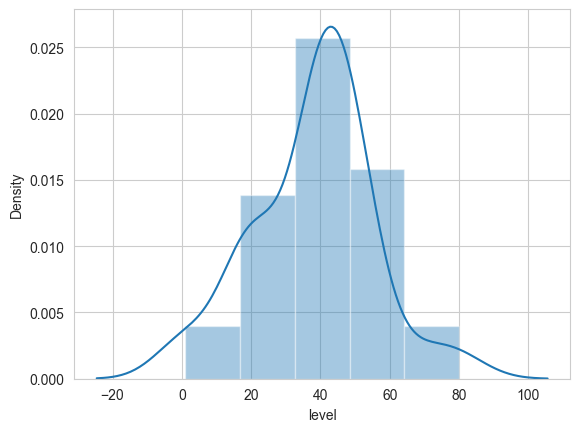

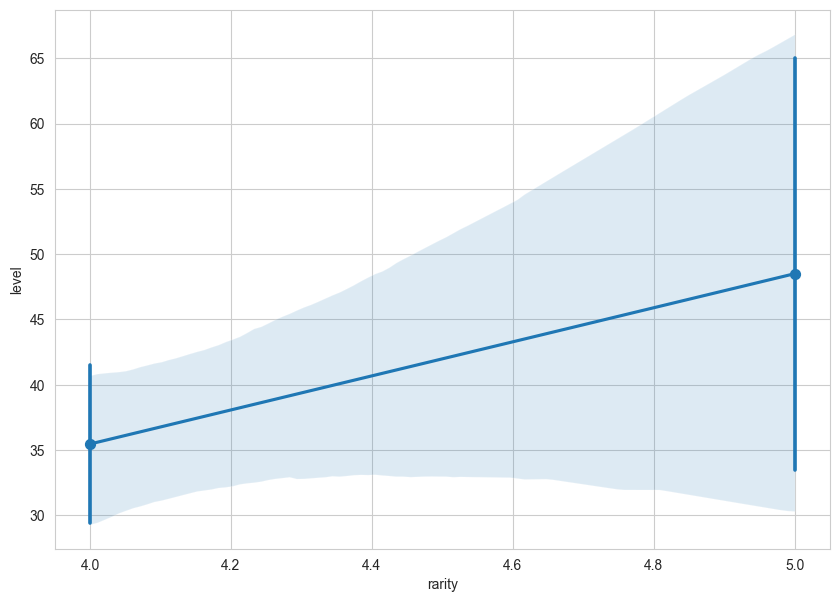

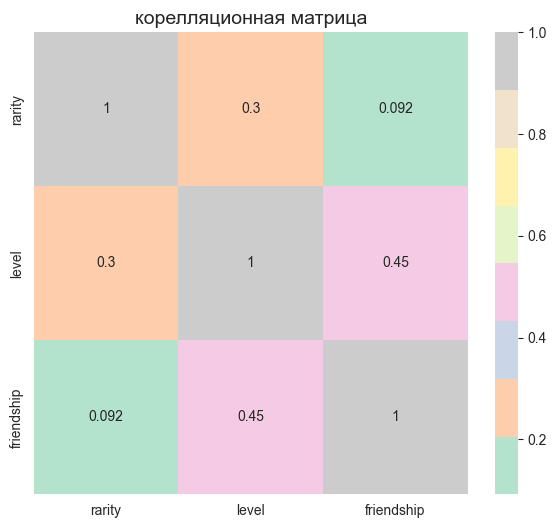

In [7]:
# Третье задание

# постройка 3 визуализаций и с помощью них создать рассказ о закономерностях, связях  обнаруженных в своих данных
# (библиотеки Matplotlib и Seaborn).

import matplotlib.pyplot as plt
import seaborn as sns 

sns.distplot(gen_df['level'])
print('\n\n первый график')
print('тут по хорошему бы иметь графиик как правую часть пораболы, но имеем, что имеем\nпоказывает, что большая плотность 40-уровневых персонажей, а остальных меньше')

plt.subplots(figsize=(10, 7))
sns.set_style('whitegrid')
sns.regplot(x = gen_df['rarity'],
            y = gen_df['level'], 
            x_estimator=np.mean)

print('\n\n второй график')
print('у четырёх-звёздочных большая плотность малоуровневых, а в пяти-звёздочных есть как прокаченные, так и непрокаченные ')



fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(gen_df_int.corr(), annot = True, cmap= 'Pastel2')
ax.set_title('корелляционная матрица', fontdict={'fontsize': 14})

print('\n\n третий график')
print('здесь как и во втором задании виднеется слабая зависимость дружбы и уровня\nпри этом нет зависимости дружбы от редкости')